<h1><center>Malaria Parasite Detection</center></h1>

<p>Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. This notebook uses Convolutional Neural Networks to predict if a thin blood smear is parasitic or uninfected in nature. This notebook uses highly processed images from the Malaria Dataset from the National Library of Medicine. Each colored image is converted to 50X50 grayscale image to reduce the size of the dataset from ~350MB to 40MB.<p>

<h2>Importing the dataset</h2>

In [3]:
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/malaria-dataset-processed.zip"
!unzip -qo malaria-dataset-processed.zip
!rm malaria-dataset-processed.zip

--2021-07-01 14:31:38--  https://cainvas-static.s3.amazonaws.com/media/user_data/um4ng-tiw0/malaria-dataset-processed.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.160.27
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.160.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43257796 (41M) [application/x-zip-compressed]
Saving to: ‘malaria-dataset-processed.zip’

malaria-dataset-pro 100%[===================>]  41.25M  84.7MB/s    in 0.5s    

2021-07-01 14:31:38 (84.7 MB/s) - ‘malaria-dataset-processed.zip’ saved [43257796/43257796]



In [4]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2

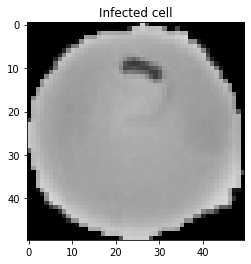

In [5]:
img = cv2.imread("cell_images/train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_181.png")
plt.title("Infected cell")
plt.imshow(img)

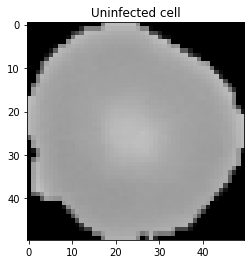

In [6]:
img = cv2.imread("cell_images/train/Uninfected/C1_thinF_IMG_20150604_104722_cell_79.png")
plt.title("Uninfected cell")
plt.imshow(img)

In [7]:
img_width = 50
img_height = 50

<h2>Preparing the data</h2>

<p>We have used ImageDataGenerator from keras, in the subsequent cells, to fetch the images along with their labels to train the neural network</p>

In [8]:
datagen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.25)

In [9]:
train_data_generator = datagen.flow_from_directory(directory="cell_images/train", target_size = (img_width, img_height), class_mode="binary", batch_size = 16, subset = "training")

Found 16536 images belonging to 2 classes.


In [10]:
validation_data_generator = datagen.flow_from_directory(directory="cell_images/train", target_size = (img_width, img_height), class_mode="binary", batch_size = 16, subset = "validation")

Found 5510 images belonging to 2 classes.


<h4>The 0 label means the cell is Parasitic and 1 means Uninfected</h4>

In [11]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

<h2> The Model </h2>

In [12]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(50, 50, 3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [14]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [15]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)]

In [16]:
history=model.fit(train_data_generator, steps_per_epoch=len(train_data_generator), epochs=100, validation_data=validation_data_generator, validation_steps = len(validation_data_generator), callbacks=my_callback)

Epoch 1/100
1034/1034 [==============================] - 6s 5ms/step - loss: 0.6001 - accuracy: 0.6555 - val_loss: 0.3544 - val_accuracy: 0.8352
Epoch 2/100
1034/1034 [==============================] - 5s 5ms/step - loss: 0.2726 - accuracy: 0.8879 - val_loss: 0.2068 - val_accuracy: 0.9201
Epoch 3/100
1034/1034 [==============================] - 5s 5ms/step - loss: 0.1966 - accuracy: 0.9261 - val_loss: 0.2062 - val_accuracy: 0.9247
Epoch 4/100
1034/1034 [==============================] - 5s 5ms/step - loss: 0.1713 - accuracy: 0.9370 - val_loss: 0.1923 - val_accuracy: 0.9267
Epoch 5/100
1034/1034 [==============================] - 5s 5ms/step - loss: 0.1610 - accuracy: 0.9411 - val_loss: 0.1665 - val_accuracy: 0.9348
Epoch 6/100
1034/1034 [==============================] - 5s 5ms/step - loss: 0.1480 - accuracy: 0.9455 - val_loss: 0.1553 - val_accuracy: 0.9434
Epoch 7/100
1034/1034 [==============================] - 5s 5ms/step - loss: 0.1430 - accuracy: 0.9458 - val_loss: 0.1541 - val_ac

In [17]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
test_data_generator = datagen.flow_from_directory(directory="cell_images/valid", target_size = (img_width, img_height), class_mode="binary", batch_size = 16, subset = "training")

Found 4134 images belonging to 2 classes.


In [18]:
test_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [19]:
model.evaluate(test_data_generator)

259/259 [==============================] - 1s 4ms/step - loss: 0.1558 - accuracy: 0.9432


[0.15583141148090363, 0.9431543350219727]

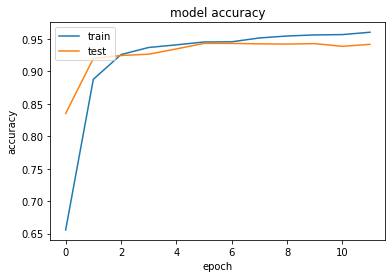

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

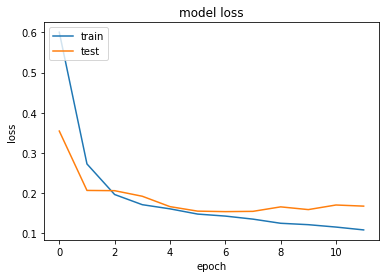

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
x,y = test_data_generator.next()
pred_array=[]
for i in range(10):
    img = x[i]
    img = img.reshape(-1,50,50,3)
    pred_val = model.predict(img)
    if(pred_val > 0.5):
        pred_val = 1
    else:
        pred_val = 0
    pred_array.append(pred_val)
    
print("Predicted Values:", pred_array)
print("Actual Values:", y[:10])

Predicted Values: [0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
Actual Values: [0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]


<h2>Visualizing the predictions of the trained model on unseen data</h2>

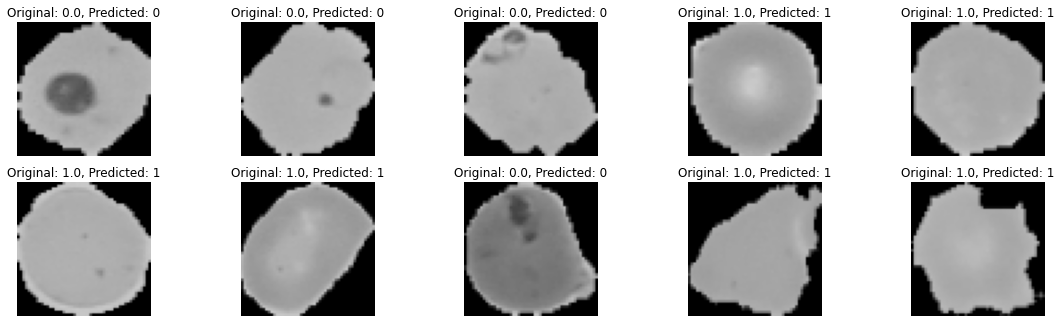

In [28]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x[i])
    plt.title('Original: {}, Predicted: {}'.format(y[i], pred_array[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=3, top=1.2)
plt.show()

In [29]:
model.save("malaria_parasite_detection.h5")